# Topic 3: Continuous Random Variables
## 1: Inverse Transform

Sampling From Gamma Distributions

In [1]:
import numpy as np
import time

from scipy.optimize import root_scalar
from scipy.stats import gamma, uniform

def inv_num(n, lmbda):
    u = uniform.rvs()
    # scipy uses mean parametrization
    f = lambda x: gamma.cdf(x, n , scale=1 / lmbda) - u
    f_prime = lambda x: gamma.pdf(x, n, scale=1 / lmbda)
    sol = root_scalar(f, x0=1, fprime=f_prime)
    return sol.root

def inv(n, lmbda):
    u = uniform.rvs(size=n)
    x = (-1 / lmbda) * np.log(np.product(u))
    return x


nsims = 100
n = 10
lmbda = 1

t1 = time.time()
X = [inv_num(n, lmbda) for i in range(0, nsims)]
t2 = time.time()

t3 = time.time()
X = [inv(n, lmbda) for i in range(0, nsims)]
t4 = time.time()

print(t2 - t1)
print(t4 - t3)


0.05297231674194336
0.01666879653930664


c:\Users\Silvia\anaconda3\lib\site-packages\scipy\optimize\_zeros_py.py:303: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


numerical inversion

In [2]:
import numpy as np
from scipy.optimize import minimize, root_scalar, Bounds
from scipy.stats import uniform

F = lambda x: (1/3) * x**2 + (1/3) * x**3 + (1/3) * x**8

def F_inv(F, u, domain):
    F_root = lambda x: F(x) - u
    sol = root_scalar(F_root, bracket=domain)
    return sol.root

U = uniform.rvs()

Y = [F_inv(F, uniform.rvs(), [0, 1]) for _ in range(1000)]

def F_inv2(F, u, domain):
    F_root = lambda x: np.sum((F(x) - u) ** 2)
    sol = minimize(F_root, x0=0.5 * np.ones(len(u)), bounds=Bounds(lb=domain[0], ub=domain[1]))
    return sol.x

F_inv2(F,uniform.rvs(size=1000),domain=[0,1])

array([0.62796377, 0.77787152, 0.54220875, 0.54885055, 0.96936052,
       0.78941213, 0.73842109, 0.52988777, 0.47024202, 0.96791047,
       0.66192361, 0.84460767, 0.94803742, 0.77115437, 0.81569828,
       0.72013743, 0.88852064, 0.68237319, 0.60697317, 0.88646565,
       0.81254061, 0.9648589 , 0.49349871, 0.67866584, 0.88347316,
       0.86257875, 0.67255609, 0.95140284, 0.86519986, 0.4042707 ,
       0.86062056, 0.41477758, 0.7147029 , 0.97147648, 0.79153002,
       0.96289947, 0.49507245, 0.7716891 , 0.5347067 , 0.63720307,
       0.89184435, 0.74225561, 0.37418719, 0.92235967, 0.89785427,
       0.98270816, 0.92047096, 0.68184909, 0.94038837, 0.98025983,
       0.99817762, 0.93826192, 0.65628221, 0.88242779, 0.62726996,
       0.75163412, 0.9423065 , 0.50840102, 0.87411535, 0.50612227,
       0.49913845, 0.95903415, 0.87797554, 0.49117549, 0.85983617,
       0.54972386, 0.55600487, 0.68464282, 0.51000146, 0.59987685,
       0.7421039 , 0.87619561, 0.46015544, 0.91463178, 0.78898

## 2: Rejection Sampling

In [1]:
import numpy as np


from scipy.stats import uniform
from time import time

def inv_method():
    u = uniform.rvs()
    x = u ** (1/4)
    return x

def reject():
    while True:
        U = uniform.rvs(size=2)
        if U[1] <= U[0]**3:
            return U[0]


n = 10000
t1 = time()
X1 = [inv_method() for i in range(0, n)]
t2 = time()

t3 = time()
X1 = [reject() for i in range(0, n)]
t4 = time()

print(t2 - t1)
print(t4 - t3)

0.41919374465942383
2.0744876861572266


Sampling from a gamma distribution

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, uniform, gamma
from scipy.special import gamma as gfunc

In [5]:
def sample_gamma(alpha, lmbda):
    beta = lmbda / alpha
    c = (alpha ** alpha) * np.exp(1 - alpha) / gfunc(alpha)
    Y = expon.rvs(scale = 1 / beta)
    ratio = gamma.pdf(Y, alpha, scale=1/lmbda) / (c * expon.pdf(Y, scale=1/beta))
    while uniform.rvs() > ratio:
        Y = expon.rvs(scale = 1 / beta)
        ratio = gamma.pdf(Y, alpha, scale=1/lmbda) / (c * expon.pdf(Y, scale=1/beta))
    return Y

In [6]:
n = 10_000
alpha = 2
lmbda = 1
G = [sample_gamma(alpha, lmbda) for i in range(0,n)]

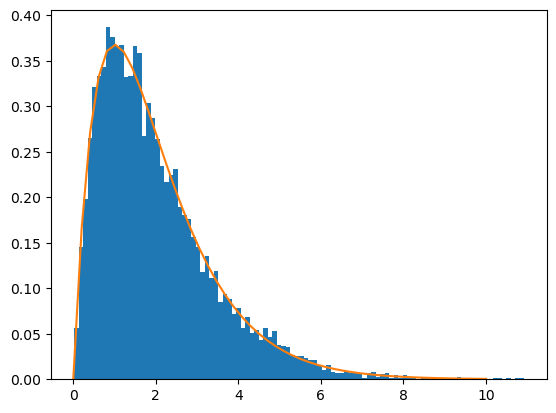

In [7]:
x_range = np.linspace(0, 10)
plt.hist(G, bins=100, density=True)
plt.plot(x_range, gamma.pdf(x_range, alpha, scale=1/lmbda))

Rejection Sampling to get a normal distribution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon, uniform

def sample_z():
    Y = expon.rvs()
    while uniform.rvs() > np.exp(-0.5 * (Y - 1)**2):
        Y = expon.rvs()
    U = uniform.rvs()
    if U < 0.5:
        Y = (-1) * Y
    return Y

n = 10_000
X = [sample_z() for i in range(0 , n)]

x = np.linspace(-3,3)
plt.hist(X, bins=100, density=True)
plt.plot(x, norm.pdf(x))

## 4: Composition Method

In [15]:
import numpy as np
from scipy.optimize import minimize_scalar, Bounds
from scipy.stats import expon, gamma, uniform

## Part I
Let's implement the insurance example from the previous sections.

First we'll write a function that samples from the distribution of the whole population.

In [16]:
# part I 


def sample():
    alpha = expon.rvs(scale=1)
    lam = expon.rvs(scale=1)
    X = gamma.rvs(alpha, scale=1/lam)
    return X

X = [sample() for _ in range(1000)]

## Part II
Now, we're interested in estimating the expectation of future claims from an individual who is observed having claims of X=2 in a given year. We will sample from the conditional distribution of $\alpha$ and $\lambda$ and for each of this samples, we will then sample from $X$ conditional on those.

In [17]:
# conditional dist, do rejection sample with exp(1) proposoal density
x = 2

f = lambda y: gamma.pdf(x, 2, scale=1/y) * expon.pdf(y)
g = lambda y: expon.pdf(y)
h = lambda y: (-1) * f(y) / g(y)
sol = minimize_scalar(h, bounds=(0, 10))
C = (-1) * h(sol.x)

In [18]:
def rej_sample():
    Y = expon.rvs()
    while uniform.rvs() > (-1) * h(Y) / C:
        Y = expon.rvs()
    return Y

In [19]:
lam = np.array([rej_sample() for _ in range(1000)])
X = gamma.rvs(2,scale=1/lam)
print(np.mean(X))

2.894384614107125
